<a href="https://colab.research.google.com/github/SaloniMehra12/deep-learning/blob/master/fahion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# http://pytorch.org/
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
import torch

In [4]:
import torch
from torchvision import datasets,transforms

#define a trasform to normalise the data 
transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5)),])

#download and load the training data
trainset=datasets.FashionMNIST('-/.pytorch/F_MNIST_data/',download=True,train=True,transform=transform)
trainloader=torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True)

#download and load the test data
transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5)),])
trainset=datasets.FashionMNIST('-/.pytorch/F_MNIST_data/',download=True,train=True,transform=transform)
trainloader=torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True)


Processing...
Done!


In [0]:
import torch.nn.functional as F
from torch import optim
from torch import nn

In [56]:
model=nn.Sequential(nn.Linear(784,264),nn.ReLU(),nn.Linear(264,128),nn.ReLU(),nn.Linear(128,64),nn.ReLU(),nn.Linear(64,10),nn.ReLU(),nn.LogSoftmax(dim=1))
criterion=nn.NLLLoss()
optimizer=optim.SGD(model.parameters(),lr=0.003)#traning data
epochs=9 # ratio of poch isto lr should be equal to 784/264
for e in range(epochs):
  running_loss=0
  for images,labels in trainloader:
    images=images.view(images.shape[0],-1)
    optimizer.zero_grad()
    output=model.forward(images)
    loss=criterion(output,labels)
    loss.backward()
    optimizer.step()
    running_loss+=loss.item()
  else:
    print({running_loss/len(trainloader)})

{2.146048643441597}
{1.4208017725553086}
{0.8455315104552678}
{0.6951578578778675}
{0.6318625474789503}
{0.5901263120141365}
{0.5591252922122159}
{0.534674559924394}
{0.5137886764016996}


In [0]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import numpy as np
import torch
import helper
import matplotlib.pyplot as plt

In [0]:
def view_classify(img, ps, version="Fashion"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout

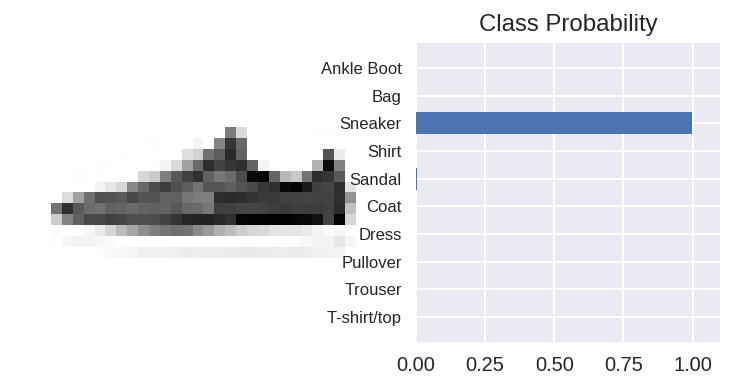

In [64]:
%matplotlib inline
images,labels=next(iter(trainloader))
img=images[0].view(1,784)
with torch.no_grad():
  logits=model.forward(img)
ps=F.softmax(logits,dim=1)
view_classify(img.view(1,28,28),ps)

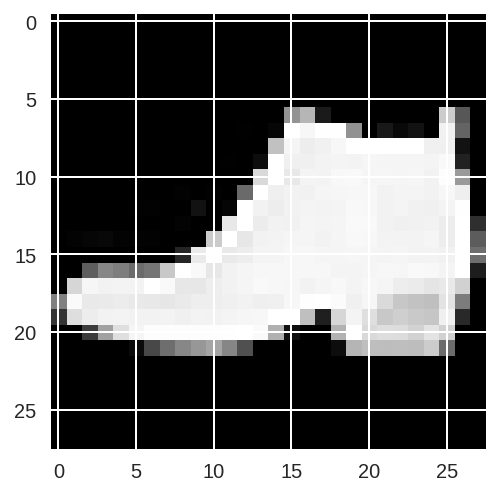

In [0]:
plt.imshow(images[1].numpy().squeeze(),cmap='Greys_r');